# 프로젝트: 인물 모드 문제점 찾기

##세그멘테이션(Segmentation)이란?
이미지에서 픽셀 단위로 관심 객체를 추출하는 방법.    
 모든 픽셀에 라벨(label)을 할당하고 같은 라벨은 "공통적인 특징"을 가진다고 가정함.    


##시맨틱 세그멘테이션(semantic segmentation)이란?
 우리가 인식하는 세계처럼 물리적 의미 단위로 인식하는 세그멘테이션

In [1]:
! mkdir -p /content/aiffel/human_segmentation/models
! mkdir -p /content/aiffel/human_segmentation/images

In [3]:
!pip install pixellib

     |████████████████████████████████| 430 kB 27.8 MB/s 
     |████████████████████████████████| 8.3 MB 55.7 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 74 kB 3.9 MB/s 
     |████████████████████████████████| 145 kB 59.3 MB/s 
     |████████████████████████████████| 1.4 MB 55.7 MB/s 
     |████████████████████████████████| 97 kB 6.7 MB/s 
     |████████████████████████████████| 843 kB 64.8 MB/s 
     |████████████████████████████████| 596 kB 48.3 MB/s 
     |████████████████████████████████| 112 kB 62.0 MB/s 
     |████████████████████████████████| 78 kB 8.5 MB/s 
     |████████████████████████████████| 87 kB 7.9 MB/s 
     |████████████████████████████████| 60.4 MB 1.2 MB/s 
     |████████████████████████████████| 4.3 MB 52.3 MB/s 
     |████████████████████████████████| 317 kB 56.6 MB/s 
     |████████████████████████████████| 59.9 MB 1.2 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220119-py3-none-any.whl si

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('뿅')

뿅


`urllib` : 웹에서 데이터를 다운로드할 때 사용    
`cv2` : OpenCV 라이브러리로 이미지를 처리하기 위해 필요    
`pixellib` : 시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리    


### 이미지 부르기

(450, 800, 3)


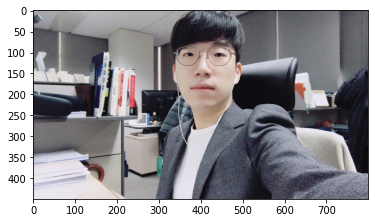

In [5]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path = '/content/aiffel/human_segmentation/images/my_image.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

##DeepLab 모델을 준비

In [3]:
# 저장할 파일 이름을 결정합니다
model_dir = '/content/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/content/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f6065430c50>)

In [7]:
import PIL
print(PIL.PILLOW_VERSION)

7.1.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  


In [11]:
!pip3 install -U pillow

##세그멘테이션

In [6]:
#세그멘테이션 모델을 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

#모델에 이미지를 입력
segvalues, output = model.segmentAsPascalvoc(img_path)

## 라벨

In [7]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

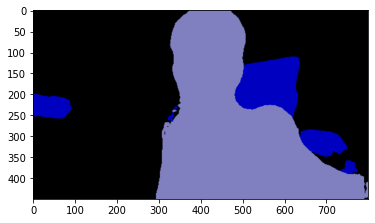

In [8]:
plt.imshow(output)
plt.show()

In [9]:
segvalues

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [10]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


In [11]:
!pip install colormap

  Created wheel for colormap: filename=colormap-1.0.4-py3-none-any.whl size=15637 sha256=d1b7335278fa5d17d21f6ceab27c4e604a48fd20ccd3cfb2b7f42a6dc9b08c6a
  Stored in directory: /root/.cache/pip/wheels/71/35/4b/259c328e39ede29b184e4ffe4443bcc2be4e475178a83794c3
Successfully built colormap


In [15]:
!pip install kat

  Created wheel for kat: filename=kat-0.1.10-py3-none-any.whl size=4660 sha256=4b5774377609a99d5b720e6c98ca9a3ee6b0a65b5c2cf9342e67231ea6c2b0eb
  Stored in directory: /root/.cache/pip/wheels/3d/40/d0/e5831af47e9345bb89e1fa2f67e3ac9b914ffa6f513cff529e
Successfully built kat


In [23]:
import kat

SyntaxError: ignored

In [24]:
#그럼 사람을 나타내는 15번째 색상
#colormap[class_id]
colormap[15]

NameError: ignored

In [20]:
kat --version

NameError: ignored

output 이미지가 BGR 순서로 채널 배치가 되어 있기 때문에 색상 값 순서를 바꿔주어야 한다.

In [25]:
seg_color = (128,128,192)

(450, 800)


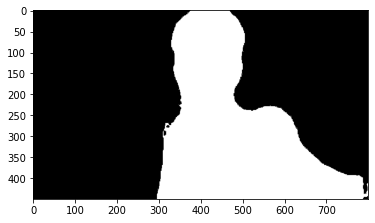

In [26]:
#seg_color로만 이루어진 마스크를 만들기
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

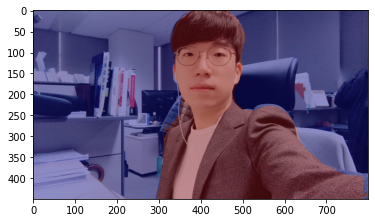

In [27]:
# 세그멘테이션이 얼마나 잘 되었는지 확인
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

##배경 흐리게 하기

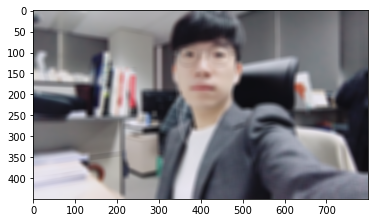

In [28]:
# 배경 흐리게 하기
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

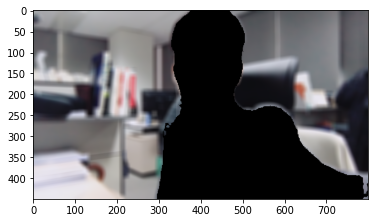

In [29]:
# 세그멘테이션 마스크를 이용해서 배경만 추하기
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

- `bitwise_not` 함수 : 이미지 반전   
배경 0, 사람 255 -> 배경 255, 사람 0
- `bitwise_and `: 배경만 있는 영상을 얻을 수 있음
 

---



##흐린 배경과 원본 영상 합성
- `np.where(조건, 참일때 x, 거짓일때y)` : 조건 에 따라 x 또는 y 에서 선택한 요소를 반환

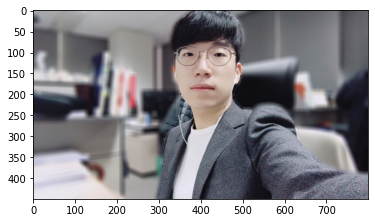

In [30]:
#배경 영상과 사람 영상 합치기
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 다른 사진
###(1) 내 사진

(1080, 1080, 3)


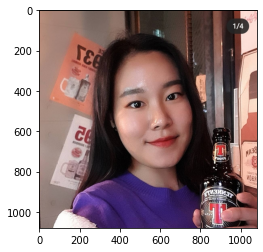

In [31]:
#사진 가져오기
img_path = '/content/aiffel/human_segmentation/images/selfie.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
#세그멘테이션 모델을 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

#모델에 이미지를 입력
segvalues, output = model.segmentAsPascalvoc(img_path)

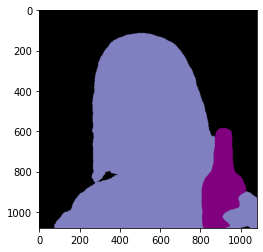

{'class_ids': array([ 0,  5, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [33]:
plt.imshow(output)
plt.show()

segvalues

In [34]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bottle
person


(1080, 1080)


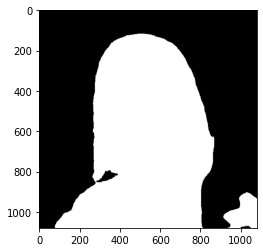

In [35]:
seg_color = (128,128,192)

#seg_color로만 이루어진 마스크를 만들기
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

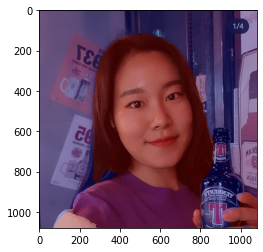

In [36]:
# 세그멘테이션이 얼마나 잘 되었는지 확인
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

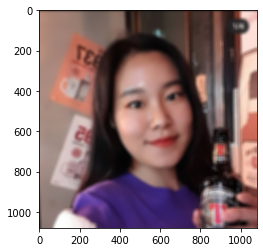

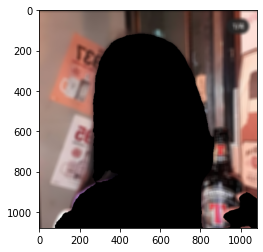

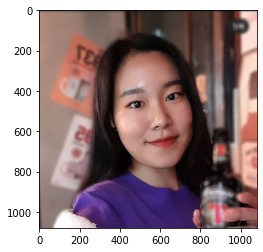

In [37]:
# 배경 흐리게 하기
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (20,20))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 세그멘테이션 마스크를 이용해서 배경만 추하기
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

#배경 영상과 사람 영상 합치기
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

###(2) 고양이 사진
- 다음 [링크](https://ceuity.tistory.com/34) 를 참고하여 진행하였다.


In [38]:
# 필요 모듈 import
import cv2
import numpy as np
import os
from glob import glob
from os.path import join
import tarfile
import urllib

from matplotlib import pyplot as plt
import tensorflow as tf

# 이미지 불러오기
import os
img_path = '/content/aiffel/human_segmentation/images/cat.jpg'  # 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요. 
img_orig = cv2.imread(img_path) 
print (img_orig.shape)

(1281, 1920, 3)


In [39]:
# DeepLabModel Class 정의
class DeepLabModel(object):
    INPUT_TENSOR_NAME = 'ImageTensor:0'
    OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
    INPUT_SIZE = 513
    FROZEN_GRAPH_NAME = 'frozen_inference_graph'

    # __init__()에서 모델 구조를 직접 구현하는 대신, tar file에서 읽어들인 그래프구조 graph_def를 
    # tf.compat.v1.import_graph_def를 통해 불러들여 활용하게 됩니다. 
    def __init__(self, tarball_path):
        self.graph = tf.Graph()
        graph_def = None
        tar_file = tarfile.open(tarball_path)
        for tar_info in tar_file.getmembers():
            if self.FROZEN_GRAPH_NAME in os.path.basename(tar_info.name):
                file_handle = tar_file.extractfile(tar_info)
                graph_def = tf.compat.v1.GraphDef.FromString(file_handle.read())
                break
        tar_file.close()

        with self.graph.as_default():
            tf.compat.v1.import_graph_def(graph_def, name='')

        self.sess = tf.compat.v1.Session(graph=self.graph)

    # 이미지를 전처리하여 Tensorflow 입력으로 사용 가능한 shape의 Numpy Array로 변환합니다.
    def preprocess(self, img_orig):
        height, width = img_orig.shape[:2]
        resize_ratio = 1.0 * self.INPUT_SIZE / max(width, height)
        target_size = (int(resize_ratio * width), int(resize_ratio * height))
        resized_image = cv2.resize(img_orig, target_size)
        resized_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
        img_input = resized_rgb
        return img_input

    def run(self, image):
        img_input = self.preprocess(image)

        # Tensorflow V1에서는 model(input) 방식이 아니라 sess.run(feed_dict={input...}) 방식을 활용합니다.
        batch_seg_map = self.sess.run(
            self.OUTPUT_TENSOR_NAME,
            feed_dict={self.INPUT_TENSOR_NAME: [img_input]})

        seg_map = batch_seg_map[0]
        return cv2.cvtColor(img_input, cv2.COLOR_RGB2BGR), seg_map

In [41]:
#가중치 가져오기
# Model 다운로드
# define model and download & load pretrained weight
_DOWNLOAD_URL_PREFIX = 'http://download.tensorflow.org/models/'

model_dir = '/content/aiffel/human_segmentation/models'
tf.io.gfile.makedirs(model_dir)

print ('temp directory:', model_dir)

download_path = os.path.join(model_dir, 'deeplab_model.tar.gz')
if not os.path.exists(download_path):
    urllib.request.urlretrieve(_DOWNLOAD_URL_PREFIX + 'deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz',
                   download_path)

MODEL = DeepLabModel(download_path)
print('model loaded successfully!')

temp directory: /content/aiffel/human_segmentation/models
model loaded successfully!


(1281, 1920, 3) (342, 513, 3) 8


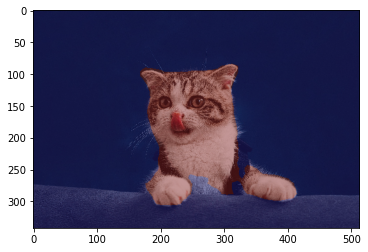

In [44]:
# 이미지 resize
img_resized, seg_map = MODEL.run(img_orig)
print (img_orig.shape, img_resized.shape, seg_map.max()) # cv2는 채널을 HWC 순서로 표시

# seg_map.max() 의 의미는 물체로 인식된 라벨 중 가장 큰 값을 뜻하며, label의 수와 일치

# PASCAL VOC로 학습된 label
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

# 사람을 찾아 시각화
img_show = img_resized.copy()
seg_map = np.where(seg_map == 8, 8, 0)  # 예측 중 고양이만 추출
img_mask = seg_map * (255/seg_map.max())  # 255 normalization
img_mask = img_mask.astype(np.uint8)
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.35, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 구글이 제공한 DeepLab은 PASCAL VOC의 라벨로 학습되었습니다. 아래는 제공하는 라벨 종류
# 위에서 12는 dog 이라는 것을 알 수 있음
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
#len(LABEL_NAMES)
LABEL_NAMES[8]

'cat'

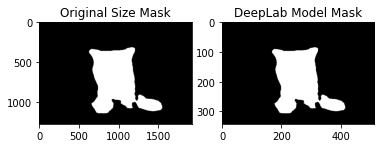

In [45]:
# 이미지 사이즈 비교
img_mask_up = cv2.resize(img_mask, img_orig.shape[:2][::-1], interpolation=cv2.INTER_LINEAR)
_, img_mask_up = cv2.threshold(img_mask_up, 128, 255, cv2.THRESH_BINARY)

ax = plt.subplot(1,2,1)
plt.imshow(img_mask_up, cmap=plt.cm.binary_r)
ax.set_title('Original Size Mask')

ax = plt.subplot(1,2,2)
plt.imshow(img_mask, cmap=plt.cm.binary_r)
ax.set_title('DeepLab Model Mask')

plt.show()

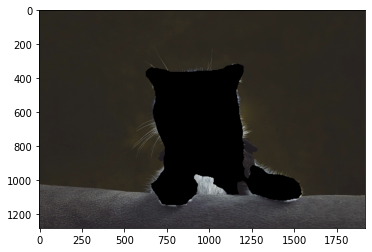

In [46]:
# 배경 이미지 얻기
img_mask_color = cv2.cvtColor(img_mask_up, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg = cv2.bitwise_and(img_orig, img_bg_mask)
plt.imshow(img_bg)
plt.show()

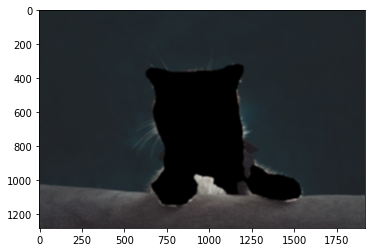

In [47]:
# 이미지 블러처리
img_bg_blur = cv2.blur(img_bg, (13,13))
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

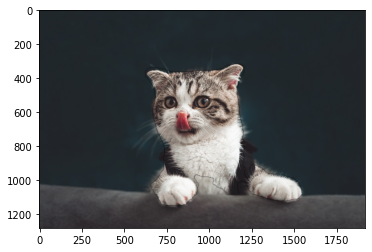

In [49]:
# 255인 부분만 원본을 가져온 후 나머지는 blur 이미지
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
import os
from io import BytesIO
import tarfile
import tempfile
from six.moves import urllib

from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

%tensorflow_version 1.x
import tensorflow as tf

tf.compat.v1.GraphDef()   # -> instead of tf.GraphDef()
#tf.compat.v2.io.gfile.GFile()

TensorFlow is already loaded. Please restart the runtime to change versions.


###(3) 배경전환 크로마키

(1280, 1920, 3)


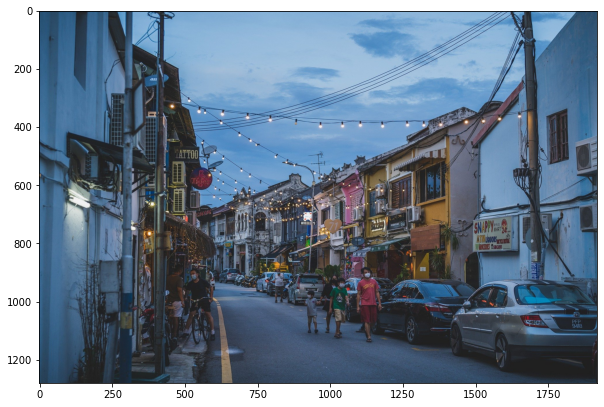

In [50]:
# 배경 이미지
back_path = '/content/aiffel/human_segmentation/images/background.jpg'  
back_orig = cv2.imread(back_path)
print(back_orig.shape)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(back_orig, cv2.COLOR_BGR2RGB))
plt.show()

(1080, 1080, 3)


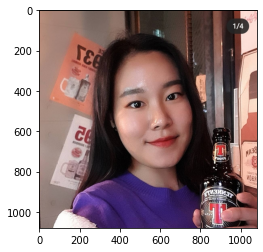

In [51]:
# 고양이 이미지
selfie_path = '/content/aiffel/human_segmentation/images/selfie.jpg'  # 본인이 사용할 사진의 경로
selfie_orig = cv2.imread(selfie_path)
print(selfie_orig.shape)

plt.imshow(cv2.cvtColor(selfie_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [52]:
# 배경 이미지와 고양이 이미지 크기 맞추기
target_size = (selfie_orig.shape[1], selfie_orig.shape[0])
back_resized = cv2.resize(back_orig, target_size)  # 배경 이미지를 target size 크기로 resize 합니다.

ValueError: ignored

###(1) DeepLab 
DeepLab v1~v3+ architecture는 구글에서 제시한 모델로, 2015년부터 현재에 이르기까지 계속해서 업데이트를 하고있는 모델입니다. DeepLab 시리즈는 여러 segmentation model 중 성능이 상위권에 포진되어있습니다.    
- DeepLab V1 : Atrous convolution을 처음 적용
- DeepLab V2 : multi-scale context를 적용하기 위한 Atrous spatial pyramid pooling(ASPP) 제안
- DeepLab V3 : 기존 ResNet 구조에 Atrous convolution을 활용
- DeepLab V3+ : Depthwise separable convolution과 Atrous convolution을 결합한 Atrous separable convolution을 제안.

(2) 오류 해결   
- AttributeError: module 'PIL.TiffTags' has no attribute 'IFD' : 런타임 재시작    
- NameError: name 'colormap' is not defined : colormap파일은 KAT과 함께 제공됨, 코랩에서는 KAT이 없기 때문에 install 해주기

#Reference
1) DeepLab이란? : https://wikidocs.net/143446    
2) DeepLab code : https://colab.research.google.com/github/tensorflow/models/blob/master/research/deeplab/deeplab_demo.ipynb    
